<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/3-1%20k-%EC%B5%9C%EA%B7%BC%EC%A0%91%20%EC%9D%B4%EC%9B%83%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3-1 k-최근접 이웃 회귀**

지도 학습 알고리즘은 분류(classification)와 회귀(regression)로 나뉩니다. 회귀는 임의의 숫자를 예측하는 문제입니다.

## **데이터 준비**

In [ ]:
import numpy as np

In [ ]:
# 'perch'는 '농어'입니다.
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

농어 데이터를 산점도에 그리겠습니다.

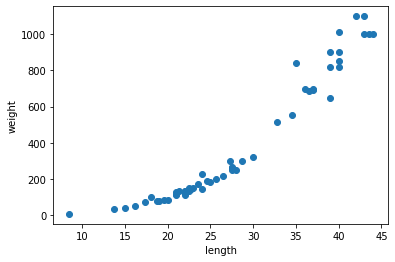

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트와 테스트 세트로 나누겠습니다. 회귀는 분류와 달리 x축을 input 데이터로 삼고, y축을 target 데이터로 삼습니다.

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(f'train_input:\n{train_input}')
print()
print(f'train_target:\n{train_target}')
print()
print(f'test_input:\n{test_input}')
print()
print(f'test_target:\n{test_target}')

train_input:
[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]

train_target:
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]

test_input:
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]

test_target:
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


사이킷런에 사용할 훈련 세트와 테스트 세트는 언제나 2차원 배열이어야 합니다. 2차원 배열로 바꾸려면 `reshape()` 메서드를 사용합니다.

In [ ]:
train_input = train_input.reshape(-1, 1)    # `np.reshape(train_input, (-1, 1))`과 같습니다.
test_input = test_input.reshape(-1, 1)
print(train_input[:5], train_input.shape)
print()
print(test_input[:5], test_input.shape)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]] (42, 1)

[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]] (14, 1)


## **결정계수($R^2$)**

k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 `KNeighborsRegressor`입니다. 사용법은 `KNeighborsClassifier` 클래스와 비슷합니다.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor 

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

테스트 세트로 모델을 평가하겠습니다.

In [ ]:
print(knr.score(test_input, test_target))

0.992809406101064


1에 근접한 결괏값입니다. 타깃에 가까울수록 1에 가깝고, 평균 정도를 예측한다면 0에 가깝습니다. 회귀에서는 이 값을 **결정계수(coefficient of determination)**라고 부릅니다. 기실 정확한 수치를 맞힌다는 것은 거의 불가능하지만 결정계수를 통해 얼마큼 근접한 수치를 맞히는지 짐작할 수 있습니다. 결정계수를 구하는 공식은 아래와 같습니다.

$R^2 = 1 - \frac{(타깃 - 예측)^2의 합}{(타깃 - 평균)^2의 합}$ 

## **예측값과 타깃값 오차**

예측값과 타깃값의 오차를 확인하려면 `sklearn.metrics` 패키지의 `mean_absolute_error()` 메서드를 사용합니다. 타깃값에서 예측값을 뺀 절댓값을 평균한 값을 도출합니다.

In [ ]:
from sklearn.metrics import mean_absolute_error

 # 테스트 세트에 대한 예측값을 만듭니다.
test_prediction = knr.predict(test_input)
print(test_prediction)
print()

mae = mean_absolute_error(test_target, test_prediction)
print(f'예측값과 타깃값의 오차 평균: {mae}')

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]

예측값과 타깃값의 오차 평균: 19.157142857142862


## **과대적합과 과소적합**

훈련 세트의 결정계수를 확인하겠습니다.

In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


보통 모델을 훈련 세트에 훈련하면 훈련 세트에 적합한 모델이 생성됩니다. 훈련 세트의 점수가 테스트 세트의 점수보다 높게 나오는 것입니다. 그러나 이 모델은 테스트 세트의 결정계수인 0.992809406101064보다 작습니다. 두 결정계수간 균형을 잡는 일은 매우 중요합니다. 아래 두 개념을 주목하시기 바랍니다.

- **과대적합(overfitting)**: 훈련 세트에만 잘 맞습니다. 데이터에 내재된 거시적인 패턴을 감지하지 못합니다. 아래 경우에 속하면 과대적합입니다. 

 - 훈련 세트 점수 > 테스트 세트 점수

- **과소적합(underfitting)**: 테스트 세트에만 잘 맞습니다. 원인은 두 가지입니다. 데이터가 적거나, 모델이 단순해서 훈련 세트에 적절하게 훈련되지 않은 경우입니다. 아래 둘 중 한 가지 케이스에 속하면 과소적합입니다.

 - 훈련 세트 점수 < 테스트 세트 점수
 
 - 훈련 세트 점수와 테스트 세트 점수 모두 낮은 점수

현재 모델은 훈련 세트 점수보다 테스트 세트 점수가 높으므로 과소적합 되었습니다.

## **과소적합 해결하기**

과소적합을 해결하려면 모델을 좀 더 복잡하게 생성하는 방법을 고려해 볼 수 있습니다. 훈련 세트에 더 적합하게 모델을 생성하면 테스트 세트의 점수는 낮아집니다. 이를 실현할 방안은 이웃 개수 k를 현재보다 줄이는 것입니다. 이웃 개수 k를 늘리면 데이터 전반에 있는 일반적인 패턴에 따르고, 이웃 개수 k를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해집니다.

 이웃의 개수를 기본값 5에서 3으로 줄이겠습니다.

In [ ]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.974645996398761


점수 차이가 크지 않습니다. 기본적으로 훈련 세트의 점수가 테스트 세트 점수보다 약간 높은 정도가 가장 이상적입니다. 차이가 최대한 적을수록 좋은 모델입니다.

## **마무리**

### **핵심 패키지와 함수**

- `mean_squared_error()`: 평균 제곱 오차를 구하는 메서드입니다. 타깃값에서 예측값을 뺀 값을 제곱하여 평균한 값을 도출합니다. 평균 절댓값 오차를 구하는 `mean_absolute_error()` 메서드와 비슷합니다.

* 확인문제

k-최근접 이웃 회귀 모델의 k값을 1, 3, 5, 7, 10으로 바꿔가며 훈련하고, 농어의 길이를 5에서 45까지 바꿔가며 예측을 만들어 그래프로 나타내세요.

*예측값:
[  32.   32.   32.   32.   32.   32.   32.   32.   32.   32.   40.   40.
   70.   70.   80.   85.  115.  135.  150.  225.  180.  197.  260.  260.
  300.  300.  514.  514.  514.  556.  840.  700.  690.  820.  820.  850.
  850. 1100. 1000. 1000. 1000.]
*훈련 세트 점수: 0.9852830341215901
*테스트 세트 점수: 0.991309195814175


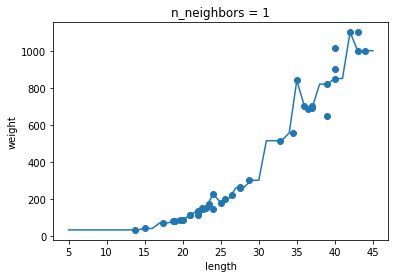

--------------------------------------------------------------
*예측값:
[  47.33333333   47.33333333   47.33333333   47.33333333   47.33333333
   47.33333333   47.33333333   47.33333333   47.33333333   47.33333333
   47.33333333   47.33333333   62.66666667   76.           81.
   95.          120.          128.33333333  155.          180.
  200.66666667  198.33333333  247.66666667  275.          275.
  275.          358.          636.66666667  636.66666667  636.66666667
  698.66666667  691.66666667  691.66666667  720.          773.33333333
  921.66666667  921.66666667 1066.66666667 1033.33333333 1033.33333333
 1033.33333333]
*훈련 세트 점수: 0.9804899950518966
*테스트 세트 점수: 0.9746459963987609


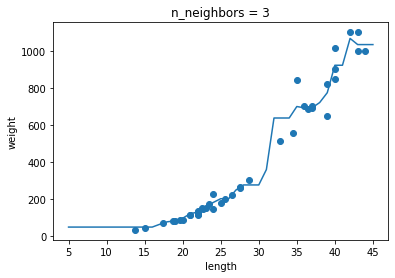

--------------------------------------------------------------
*예측값:
[  60.    60.    60.    60.    60.    60.    60.    60.    60.    60.
   60.    60.    70.6   79.6   79.6   95.   113.   123.   168.   174.
  193.   224.   248.   248.   248.   311.4  379.   582.   659.   659.
  694.2  723.   719.   709.   847.   847.   993.   990.  1010.  1010.
 1010. ]
*훈련 세트 점수: 0.9698823289099254
*테스트 세트 점수: 0.992809406101064


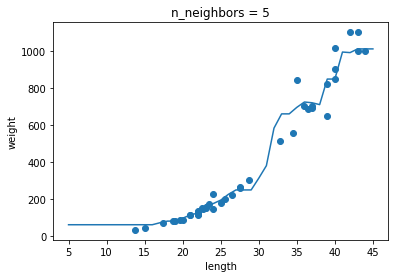

--------------------------------------------------------------
*예측값:
[ 67.14285714  67.14285714  67.14285714  67.14285714  67.14285714
  67.14285714  67.14285714  67.14285714  67.14285714  67.14285714
  67.14285714  67.14285714  67.14285714  79.          89.
  96.14285714 115.         130.         145.         166.42857143
 183.57142857 212.85714286 223.57142857 223.57142857 276.28571429
 330.         421.85714286 550.71428571 669.28571429 669.28571429
 669.28571429 688.71428571 726.42857143 727.85714286 803.57142857
 919.28571429 969.28571429 995.         995.         995.
 995.        ]
*훈련 세트 점수: 0.9761170732051527
*테스트 세트 점수: 0.9781383949643516


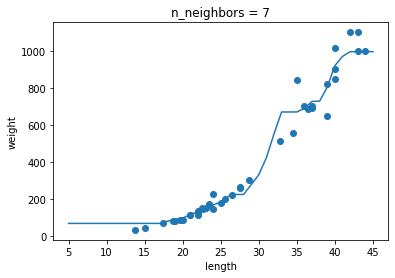

--------------------------------------------------------------
*예측값:
[ 81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5  81.5
  81.5  91.3 100.8 104.8 116.  128.5 148.  161.2 195.5 211.  211.  247.4
 247.4 347.5 453.5 551.  551.  645.5 700.5 700.5 739.1 785.  811.  882.5
 912.5 912.5 912.5 912.5 912.5]
*훈련 세트 점수: 0.96164569026043
*테스트 세트 점수: 0.9737908255822255


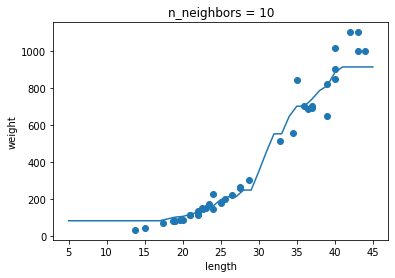

--------------------------------------------------------------


In [33]:
knr = KNeighborsRegressor()

# 5에서 45까지 농어의 길이인 x좌표를 만듭니다.
x = np.arange(5, 46).reshape(-1, 1)

# `n = 1, 5, 10`일 때 예측 결과를 그래프로 그립니다.
n_list = [1, 3, 5, 7, 10]

for n in n_list:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)    # x에 대한 예측을 구합니다.
    print(f'*예측값:\n{prediction}')
    print(f'*훈련 세트 점수: {knr.score(train_input, train_target)}')
    print(f'*테스트 세트 점수: {knr.score(test_input, test_target)}')

    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')

    plt.show()
    print('--------------------------------------------------------------')